# Job - Peak6
> Preperation for Peak6 SE interview.

- toc: true
- branch: master
- badges: true
- comments: true
- author: Stephen Zagar
- categories: [job, interview, python]

#### Code - Arrival / Departure

```
You are given the arrival and departure times of airplanes at an airport for a single day. Schedules for the airplanes remain the same across all days. You are to determine the number of gates the airport should have so that no plane spends time waiting for a gate.

arr = [9:30, 11:15, 16:30]
dep = [11:45, 11:30, 16:45]
Arr array is sorted by time. And departure array is sorted by corresponding arrival times. Plane 'i' arrives at time arr[i] and departs at time dep[i]

Notes:
After some questions, it was decided that minute was the smallest unit of time we cared about. Gate was considered occupied on the arriving minute, but empty on the departing minute. And that the arrival and departure times could be represented as such as integers. e.g. Day runs from minute 0 to minute 1339 (since using a zero-based index). So our example times represented as:
arr = [570, 675, 990]
dept = [705, 690, 1005]
```


In [96]:
arr = ["9:30", "11:15", "16:30"]
dep = ["11:45", "11:30", "16:45"]
arr_int = [int(h)*60+int(m) for h, m in [ts.split(':') for ts in arr]]
dep_int = [int(h)*60+int(m) for h, m in [ts.split(':') for ts in dep]]
dep_int = sorted(dep_int)
print(arr_int)
print(dep_int)

[570, 675, 990]
[690, 705, 1005]


In [101]:
arr_ptr = dep_ptr = cnt = gates = 0
while True:
    if arr_int[arr_ptr] <= dep_int[dep_ptr]:
        cnt += 1
        arr_ptr += 1
        print(f"{'arrival':12} {cnt}")
    else:
        cnt -= 1
        cnt = max(0,cnt)
        dep_ptr += 1
        print(f"{'departure':12} {cnt}")
    gates = max(gates,cnt)
    if arr_ptr == len(arr_int): break
print(f"{gates} gates needed")
    

arrival      1
arrival      2
departure    1
departure    0
arrival      1
2 gates needed


In [ ]:
from rich import print

In [76]:
arr = ['9:30', '11:15', '16:30']
dep = ['11:45', '11:30', '16:45']
dep = ['11:15', '11:30', '16:45']

In [77]:
arr_int = [int(h)*60+int(m) for h, m in [tm.split(":") for tm in arr]]
dep_int = [int(h)*60+int(m) for h, m in [tm.split(":") for tm in dep]]
dep_int.sort()

In [78]:
print(arr_int)
print(dep_int)

[570, 675, 990]
[675, 690, 1005]


In [88]:
print(arr_int)
print(dep_int)

cnt = gates = dep_ptr = 0
for arr_tm in arr_int:
    print(arr_tm,dep_ptr,dep_int[dep_ptr],cnt)
    if arr_tm < dep_int[dep_ptr]:
        print("arrival")
        cnt += 1
    else:
        print("departure")
        cnt -= 1
        dep_ptr += 1
    gates = max(gates,cnt)
print(f"gates = {gates}")

[570, 675, 990]
[675, 690, 1005]
570 0 675 0
arrival
675 0 675 1
departure
990 1 690 0
departure
gates = 1


In [84]:
print(arr_int)
print(dep_int)
cnt = gates = arr_ptr = dep_ptr = 0
while True:
    print(arr_ptr,arr_int[arr_ptr],dep_ptr,dep_int[dep_ptr],cnt)
    if arr_int[arr_ptr] <= dep_int[dep_ptr]:
        print("arrival")
        cnt += 1
        arr_ptr += 1
    else:
        print("departure")
        cnt -= 1
        dep_ptr += 1
    gates = max(gates,cnt)
    if arr_ptr == len(arr_int) or dep_ptr == len(dep_int):
        break
print(f"gates = {gates}")

[570, 675, 990]
[675, 690, 1005]
0 570 0 675 0
arrival
1 675 0 675 1
arrival
2 990 0 675 2
departure
2 990 1 690 1
departure
2 990 2 1005 0
arrival
gates = 2


#### Kangaroo words

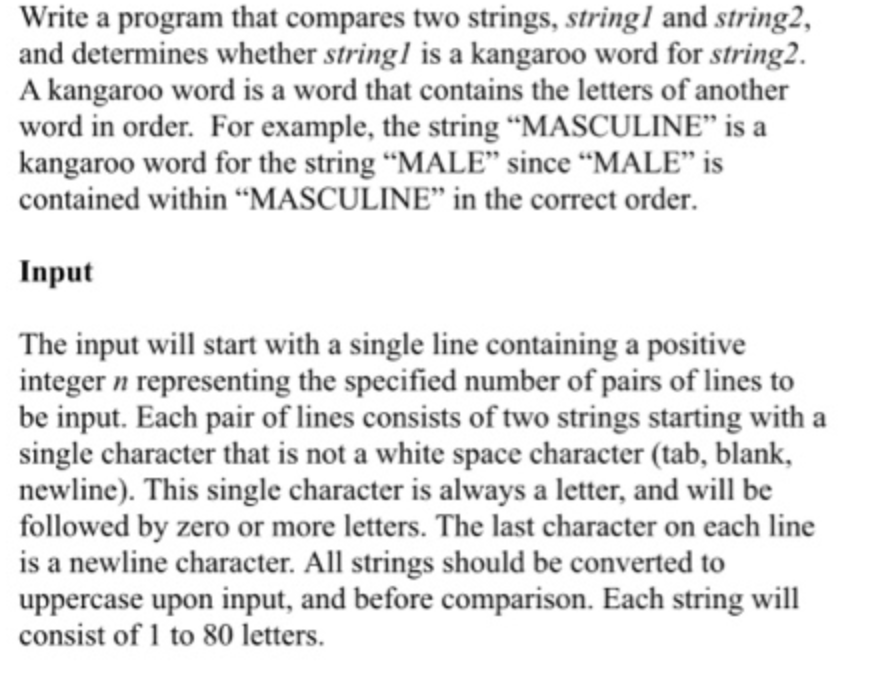

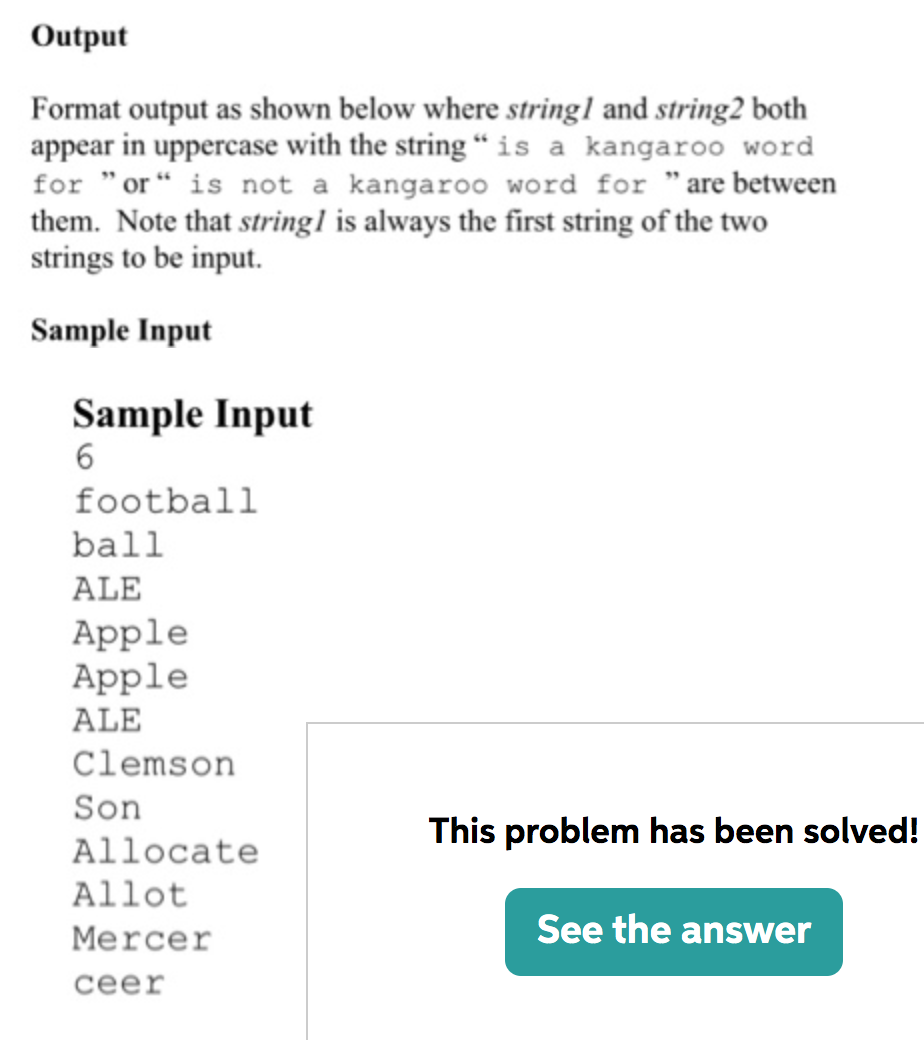

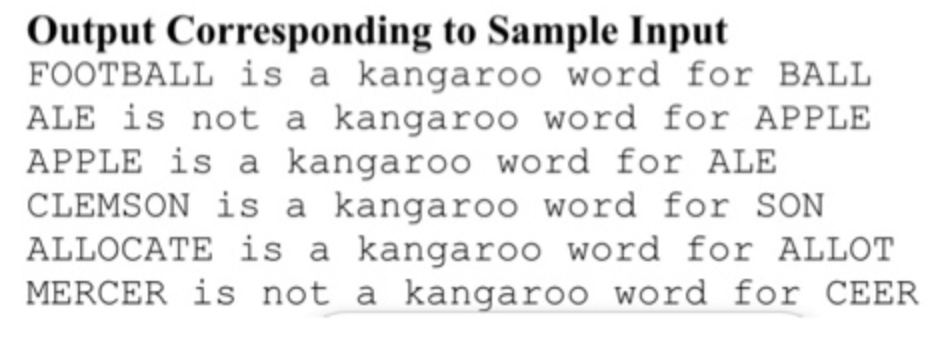

In [103]:
inp = '''
8
football
ball
ALE
Apple
Apple
ALE
Clemson
Son
Allocate
Allot
Mercer
cerr
bitch
bitch
EEEEEEEE
EEEEEEE
'''

In [104]:
inp = inp.split()
n_pairs = int(inp[0])
kang_pairs = [(inp[idx], inp[idx+1]) for idx in range(1,len(inp)-1,2)]
#kang_pairs = [(inp[n], inp[n+1]) for n in range(1,len(inp)-1,2)]

In [105]:
n_pairs

8

In [106]:
kang_pairs

[('football', 'ball'),
 ('ALE', 'Apple'),
 ('Apple', 'ALE'),
 ('Clemson', 'Son'),
 ('Allocate', 'Allot'),
 ('Mercer', 'cerr'),
 ('bitch', 'bitch'),
 ('EEEEEEEE', 'EEEEEEE')]

In [118]:
def is_kang_word(word,kang) -> bool:
    word = word.upper()
    kang = kang.upper()
    if len(word) == len(kang): return False
    k_ptr = w_ptr = 0
    while True:
        if kang[k_ptr] == word[w_ptr]:
            k_ptr += 1
        w_ptr += 1
        if k_ptr == len(kang): 
            return True
        if w_ptr == len(word): break
    return False

In [121]:
import re
def is_kang_word(word,kang) -> bool:
    if len(word) == len(kang): return False
    return re.match(f".*{'.*'.join(kang)}.*",word)

In [89]:
import re
def is_kang_word(word,kang):
    pattern = f'.*{".*".join(kang)}.*'
    return re.match(pattern,word) and len(word) != len(kang)

In [122]:
for word,kang in kang_pairs:
    is_or_not = " not "
    if is_kang_word(word.upper(), kang.upper()):
        is_or_not = " "
    print(f"{word.upper()} is{is_or_not}a kangaroo word for {kang.upper()}")

FOOTBALL is a kangaroo word for BALL
ALE is not a kangaroo word for APPLE
APPLE is a kangaroo word for ALE
CLEMSON is a kangaroo word for SON
ALLOCATE is a kangaroo word for ALLOT
MERCER is not a kangaroo word for CERR
BITCH is not a kangaroo word for BITCH
EEEEEEEE is a kangaroo word for EEEEEEE


In [74]:
def is_kang_word2(word,kang):
    k_ptr = w_ptr = 0
    while w_ptr < len(word):
        if kang[k_ptr]== word[w_ptr]:
            k_ptr += 1
        if k_ptr == len(kang) and len(word) != len(kang):
            return True
        w_ptr += 1
    return False

In [75]:
for word,kang in kang_pairs:
    is_or_not = " not "
    if is_kang_word2(word.upper(), kang.upper()):
        is_or_not = " "
    print(f"{word.upper()} is{is_or_not}a kangaroo word for {kang.upper()}")

FOOTBALL is a kangaroo word for BALL
ALE is not a kangaroo word for APPLE
APPLE is a kangaroo word for ALE
CLEMSON is a kangaroo word for SON
ALLOCATE is a kangaroo word for ALLOT
MERCER is not a kangaroo word for CERR
BITCH is not a kangaroo word for BITCH
EEEEEEEE is a kangaroo word for EEEEEEE
